In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.stats import chi2_contingency
import plotly.express as px

Hacer una columna resumida del  job title agrupado

Organization de las carpetas del proyecto 

Grafic pair plot 

Gráficas de correlación

In [109]:
url = 'salaries _2.csv'
df = pd.read_csv(url)


In [110]:
df = df.drop(columns=["salary_currency", "salary"])

In [111]:
df

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT            Data Scientist   
1           2024               MI              FT            Data Scientist   
2           2024               MI              CT            Data Scientist   
3           2024               MI              CT            Data Scientist   
4           2024               MI              FT      Data Science Manager   
...          ...              ...             ...                       ...   
16489       2020               SE              FT            Data Scientist   
16490       2021               MI              FT  Principal Data Scientist   
16491       2020               EN              FT            Data Scientist   
16492       2020               EN              CT     Business Data Analyst   
16493       2021               SE              FT      Data Science Manager   

       salary_in_usd employee_residence  remote_ratio company_location  \
0             120000                 AU             0               AU   
1              70000                 AU             0               AU   
2             130000                 US             0               US   
3             110000                 US             0               US   
4             240000                 US             0               US   
...              ...                ...           ...              ...   
16489         412000                 US           100               US   
16490         151000                 US           100               US   
16491         105000                 US           100               US   
16492         100000                 US           100               US   
16493          94665                 IN            50               IN   

      company_size  
0                S  
1                S  
2                M  
3                M  
4                M  
...            ...  
16489            L  
16490            L  
16491            S  
16492            L  
16493            L  

[16494 rows x 9 columns]

In [112]:
df.shape

(16494, 9)

In [113]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary_in_usd       16494 non-null  int64 
 5   employee_residence  16494 non-null  object
 6   remote_ratio        16494 non-null  int64 
 7   company_location    16494 non-null  object
 8   company_size        16494 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [115]:
df.describe()

work_year  salary_in_usd  remote_ratio
count  16494.000000   16494.000000  16494.000000
mean    2023.224991  149713.575725     32.044986
std        0.713405   68516.136918     46.260201
min     2020.000000   15000.000000      0.000000
25%     2023.000000  101517.500000      0.000000
50%     2023.000000  141300.000000      0.000000
75%     2024.000000  185900.000000    100.000000
max     2024.000000  800000.000000    100.000000

c:\Users\germa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\germa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\germa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


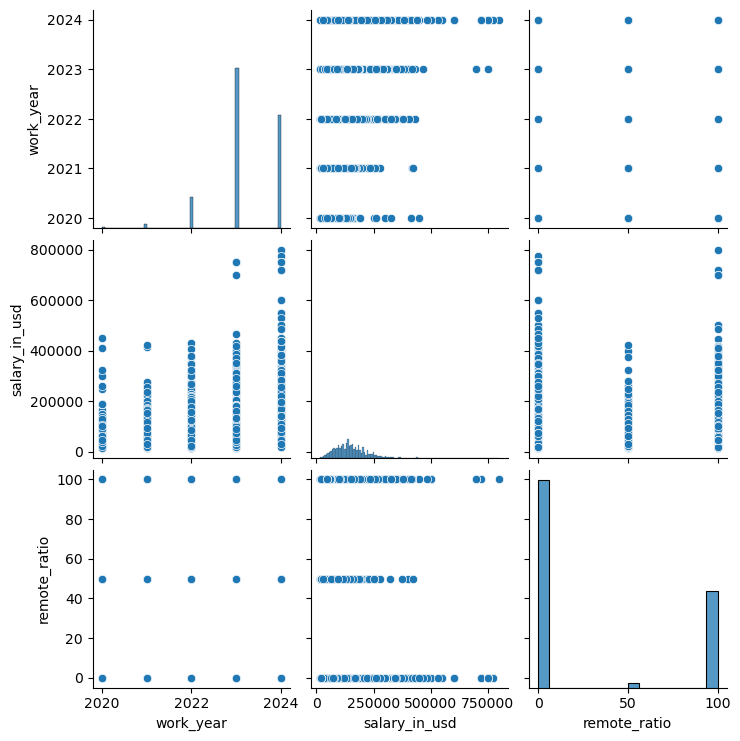

In [116]:
sns.pairplot(df)

In [117]:
df.employment_type.nunique()

4

In [118]:
df['employment_type'].value_counts()

employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [119]:
df.experience_level.nunique()

4

In [120]:
df['experience_level'].value_counts()

experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

In [121]:
df.job_title.nunique()

155

In [122]:
palabras_eliminar_trabajos = ["Manager", "Specialist", "Lead", "Director", "of", "Principal", "Managing", "Staff", "AWS", "Associate", "CRM", "Applied", "Head", "Quantitative", "Cloud", "Financial", "Marketing", "Compliance"]

In [123]:
#Introducimos un texto y una lista de palabras y si el texto se encuentra dentro de la lista lo sustituimos por un espacio.

def eliminar_palabras(text, palabras):
    for palabra in palabras:
        text = text.replace(palabra, "")
    
    return text.strip()
    

In [124]:

def modificar_palabras(text, palabras_mod):
    for palabra, modificar in palabras_mod.items():
        text = text.replace(palabra, modificar)
    
    return text.strip()

In [125]:
df["job_title_clean"] = df.job_title.apply(lambda x : eliminar_palabras(x, palabras_eliminar_trabajos))

In [126]:
palabras_mod = {"Science": "Scientist", "Analytics": "Analyst"}

In [127]:
df["job_title_clean"] = df.job_title_clean.apply(lambda x : modificar_palabras(x, palabras_mod))

In [128]:
df.job_title_clean.nunique()

104

In [129]:
pd.set_option('display.max_rows', None)
pd.DataFrame(df.job_title_clean.value_counts(normalize=True))


proportion
job_title_clean                                     
Data Scientist                              0.231903
Data Engineer                               0.210380
Data Analyst                                0.154238
Machine Learning Engineer                   0.103977
Research Scientist                          0.032133
Data Architect                              0.026434
Scientist                                   0.026252
Analyst Engineer                            0.026131
Data                                        0.023221
Research Engineer                           0.018552
Business Intelligence Engineer              0.015036
ML Engineer                                 0.012004
Business Intelligence Analyst               0.011580
Machine Learning Scientist                  0.009215
Business Intelligence                       0.008245
Research Analyst                            0.007518
AI Engineer                                 0.007154
BI Developer                                0.005457
Data Scientist Consultant                   0.005032
Business Intelligence Developer             0.003456
Data Modeler                                0.003395
BI Analyst                                  0.002668
Decision Scientist                          0.002304
Data Product                                0.002183
Machine Learning Infrastructure Engineer    0.002001
Computer Vision Engineer                    0.001940
Data Developer                              0.001819
AI Architect                                0.001758
Data Scientist Engineer                     0.001758
ETL Developer                               0.001698
AI Scientist                                0.001576
Data Strategist                             0.001455
Data Operations Analyst                     0.001455
Data Quality Analyst                        0.001455
Data Integration                            0.001394
MLOps Engineer                              0.001394
Data Infrastructure Engineer                0.001334
Data Operations                             0.001334
Data Management Analyst                     0.001334
Business Data Analyst                       0.001273
Machine Learning Researcher                 0.001273
Data Integration Engineer                   0.001213
AI Developer                                0.001152
BI Data Analyst                             0.001152
Prompt Engineer                             0.001031
Data Scientist Practitioner                 0.000970
Data Operations Engineer                    0.000970
Machine Learning Stware Engineer            0.000909
NLP Engineer                                0.000909
Data Visualization                          0.000849
Insight Analyst                             0.000849
Machine Learning                            0.000788
Database Engineer                           0.000788
Data Management                             0.000788
Deep Learning Engineer                      0.000728
Big Data Engineer                           0.000728
Robotics Engineer                           0.000728
Machine Learning Developer                  0.000606
Machine Learning Operations Engineer        0.000546
Data Product Owner                          0.000485
Robotics Stware Engineer                    0.000485
Encounter Data Management Pressional        0.000485
Data Analyst Consultant                     0.000485
AI Research Engineer                        0.000424
AI Programmer                               0.000424
Product Data Analyst                        0.000364
Data Quality                                0.000364
Computer Vision Stware Engineer             0.000303
Data Analyst Engineer                       0.000303
Machine Learning Research Engineer          0.000303
AI Stware Engineer                          0.000303
Data Quality Engineer                       0.000303
Computational Biologist                     0.000243
Admin & Data Analyst                        0.000243
Data Visualiza

In [130]:
pd.set_option('display.max_rows', 50)

In [131]:
df

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT            Data Scientist   
1           2024               MI              FT            Data Scientist   
2           2024               MI              CT            Data Scientist   
3           2024               MI              CT            Data Scientist   
4           2024               MI              FT      Data Science Manager   
...          ...              ...             ...                       ...   
16489       2020               SE              FT            Data Scientist   
16490       2021               MI              FT  Principal Data Scientist   
16491       2020               EN              FT            Data Scientist   
16492       2020               EN              CT     Business Data Analyst   
16493       2021               SE              FT      Data Science Manager   

       salary_in_usd employee_residence  remote_ratio company_location  \
0             120000                 AU             0               AU   
1              70000                 AU             0               AU   
2             130000                 US             0               US   
3             110000                 US             0               US   
4             240000                 US             0               US   
...              ...                ...           ...              ...   
16489         412000                 US           100               US   
16490         151000                 US           100               US   
16491         105000                 US           100               US   
16492         100000                 US           100               US   
16493          94665                 IN            50               IN   

      company_size        job_title_clean  
0                S         Data Scientist  
1                S         Data Scientist  
2                M         Data Scientist  
3                M         Data Scientist  
4                M         Data Scientist  
...            ...                    ...  
16489            L         Data Scientist  
16490            L         Data Scientist  
16491            S         Data Scientist  
16492            L  Business Data Analyst  
16493            L         Data Scientist  

[16494 rows x 10 columns]

In [132]:
df['job_title'].value_counts()

job_title
Data Engineer                    3456
Data Scientist                   3312
Data Analyst                     2428
Machine Learning Engineer        1703
Research Scientist                529
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Data Analytics Associate            1
Name: count, Length: 155, dtype: int64

In [133]:
df['job_title'].value_counts(normalize=True)

job_title
Data Engineer                    0.209531
Data Scientist                   0.200800
Data Analyst                     0.147205
Machine Learning Engineer        0.103250
Research Scientist               0.032072
                                   ...   
Quantitative Research Analyst    0.000061
AWS Data Architect               0.000061
Analytics Engineering Manager    0.000061
Marketing Data Scientist         0.000061
Data Analytics Associate         0.000061
Name: proportion, Length: 155, dtype: float64

In [134]:
df.job_title.unique()

array(['Data Scientist', 'Data Science Manager',
       'Business Intelligence Engineer', 'Data Architect', 'Data Analyst',
       'Business Intelligence', 'ML Engineer', 'Data Modeler',
       'Machine Learning Engineer', 'Data Integration Specialist',
       'Research Scientist', 'Data Engineer', 'Data Product Manager',
       'Data Manager', 'Data Visualization Specialist', 'Data Science',
       'Data Specialist', 'Business Intelligence Lead',
       'Research Analyst', 'Business Intelligence Analyst', 'AI Engineer',
       'AI Software Engineer', 'Machine Learning Scientist',
       'Data Science Engineer', 'Applied Scientist',
       'Machine Learning Operations Engineer', 'Analytics Engineer',
       'Data Management Analyst',
       'Encounter Data Management Professional',
       'Data Analytics Specialist', 'Head of Data', 'Data Analytics Lead',
       'Research Engineer', 'AI Scientist',
       'Business Intelligence Developer', 'Machine Learning Developer',
       'Data Man

In [135]:
df.company_location.nunique()

77

In [136]:
df['company_location'].value_counts()

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, Length: 77, dtype: int64

In [137]:
df.company_location.unique()

array(['AU', 'US', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'IN', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [138]:
df.company_size.nunique()

3

In [139]:
df['company_size'].value_counts()


company_size
M    15268
L     1038
S      188
Name: count, dtype: int64

In [140]:
pd.DataFrame(df.job_title_clean.value_counts(normalize=True))

proportion
job_title_clean                      
Data Scientist               0.231903
Data Engineer                0.210380
Data Analyst                 0.154238
Machine Learning Engineer    0.103977
Research Scientist           0.032133
...                               ...
Big Data Developer           0.000061
Sales Data Analyst           0.000061
BI Data Engineer             0.000061
Deep Learning Researcher     0.000061
Data Scientist Tech          0.000061

[104 rows x 1 columns]

In [142]:
df_prueba = pd.DataFrame(data= pd.DataFrame(df.job_title_clean.value_counts(normalize=True), columns=["proportion"]).values, columns=["proportion"], index=[pd.DataFrame(df.job_title_clean.value_counts(normalize=True), columns=["proportion"]).index])

In [143]:
df_prueba = df_prueba.reset_index()

In [144]:
df_prueba

job_title_clean  proportion
0               Data Scientist    0.231903
1                Data Engineer    0.210380
2                 Data Analyst    0.154238
3    Machine Learning Engineer    0.103977
4           Research Scientist    0.032133
..                         ...         ...
99          Big Data Developer    0.000061
100         Sales Data Analyst    0.000061
101           BI Data Engineer    0.000061
102   Deep Learning Researcher    0.000061
103        Data Scientist Tech    0.000061

[104 rows x 2 columns]

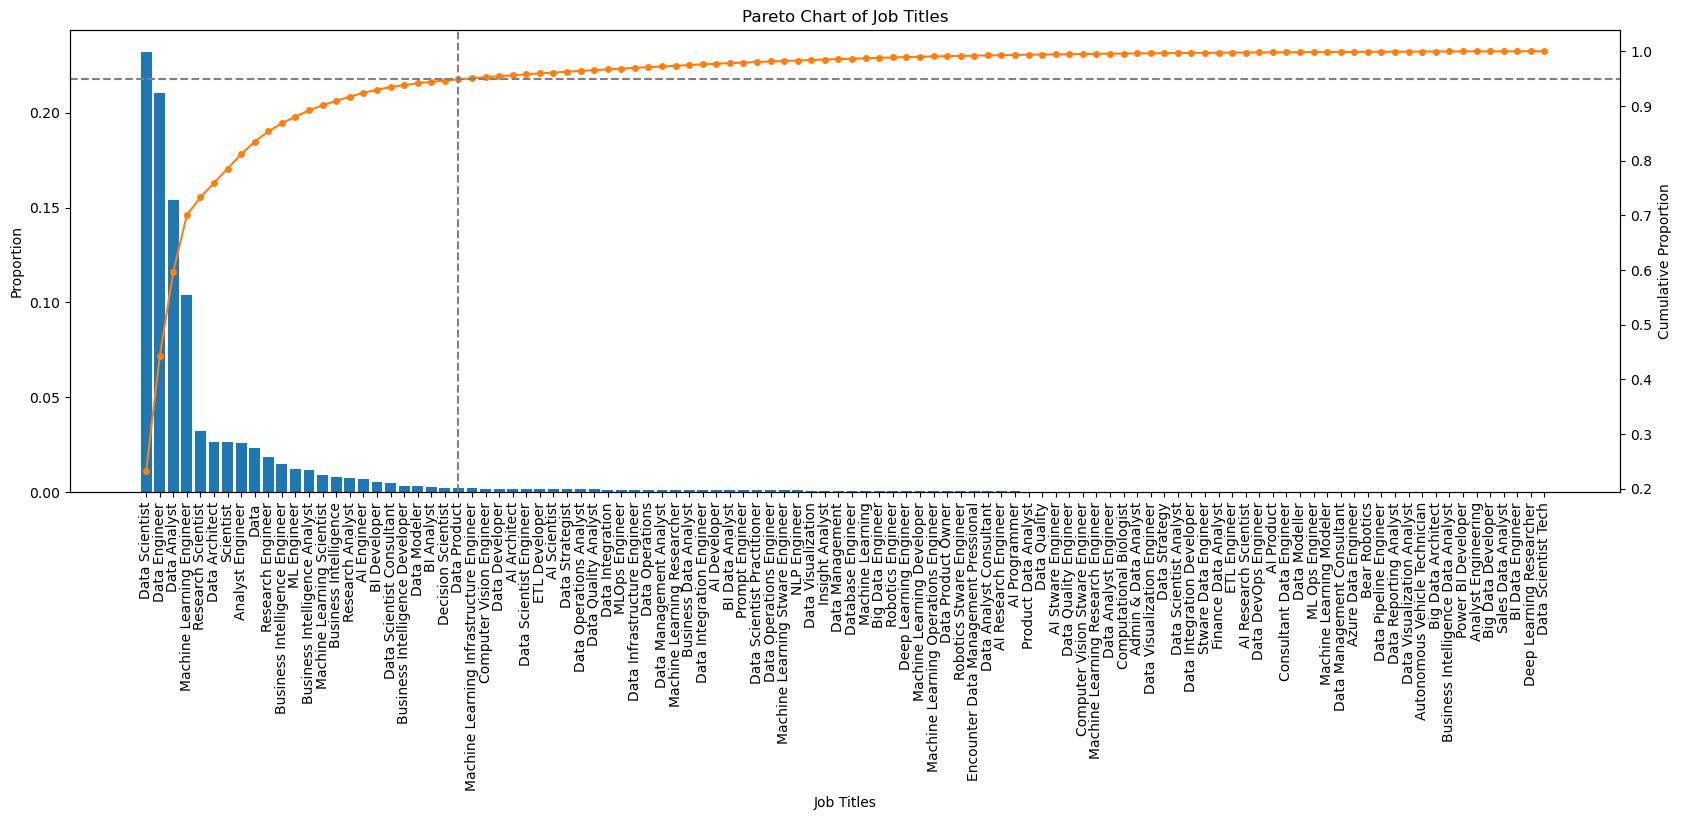

In [145]:
# Sorting the dataframe by proportion in descending order
df_grafic = df_prueba.sort_values(by='proportion', ascending=False).reset_index(drop=True)

# Calculating the cumulative sum of the proportions
df_grafic['cumulative_sum'] = df_grafic['proportion'].cumsum()

# Identifying the threshold index for the cumulative sum of 80%
threshold_index = df_grafic[df_grafic['cumulative_sum'] <= 0.95].index[-1] + 1

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plotting the bar chart
ax1.bar(df_grafic['job_title_clean'], df_grafic['proportion'], color='C0')
ax1.set_xlabel('Job Titles')
ax1.set_ylabel('Proportion')
ax1.tick_params(axis='x', rotation=90)

# Plotting the cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(df_grafic['job_title_clean'], df_grafic['cumulative_sum'], color='C1', marker='o', ms=4)
ax2.axhline(y=0.95, color='gray', linestyle='--')
ax2.set_ylabel('Cumulative Proportion')

# Highlighting the threshold point
ax2.axvline(x=threshold_index - 1, color='gray', linestyle='--')

plt.title('Pareto Chart of Job Titles')
plt.show()

In [147]:
df.head()

work_year experience_level employment_type             job_title  \
0       2024               MI              FT        Data Scientist   
1       2024               MI              FT        Data Scientist   
2       2024               MI              CT        Data Scientist   
3       2024               MI              CT        Data Scientist   
4       2024               MI              FT  Data Science Manager   

   salary_in_usd employee_residence  remote_ratio company_location  \
0         120000                 AU             0               AU   
1          70000                 AU             0               AU   
2         130000                 US             0               US   
3         110000                 US             0               US   
4         240000                 US             0               US   

  company_size job_title_clean  
0            S  Data Scientist  
1            S  Data Scientist  
2            M  Data Scientist  
3            M  Data Scientist  
4            M  Data Scientist

In [151]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [149]:
# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df['salary_in_usd'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

salary_in_usd    1.0
dtype: float64

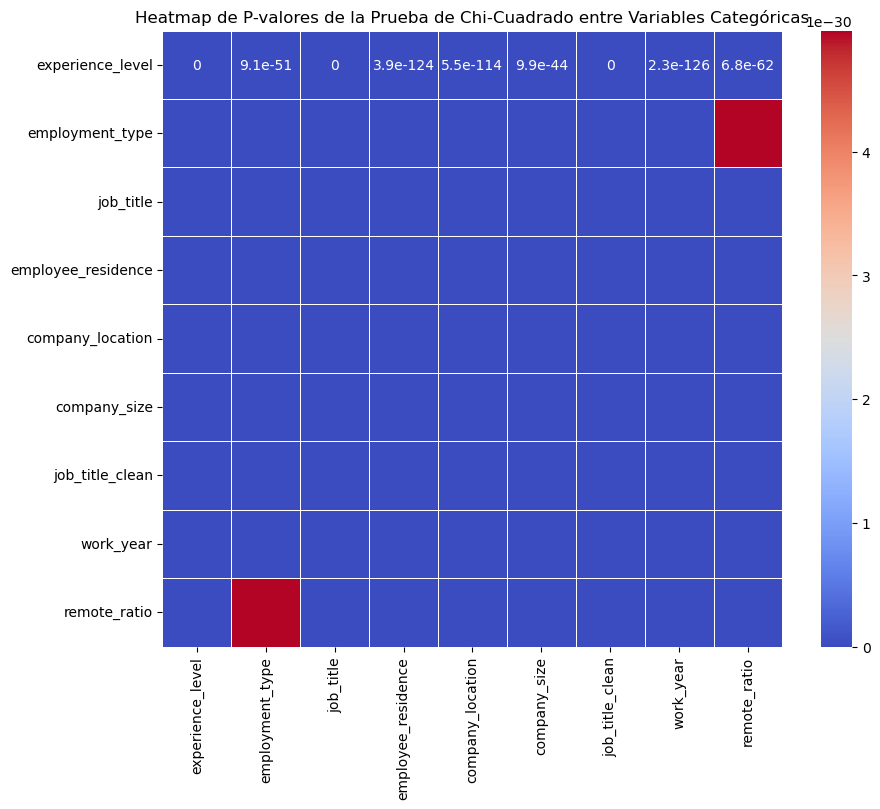

In [163]:
categorical_columns = df_categorical.columns

p_values = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))), 
                        columns=categorical_columns, index=categorical_columns)

for var1, var2 in itertools.combinations(categorical_columns, 2):
    contingency_table = pd.crosstab(df_categorical[var1], df_categorical[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values.loc[var1, var2] = p
    p_values.loc[var2, var1] = p

plt.figure(figsize=(10, 8))

sns.heatmap(p_values, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap de P-valores de la Prueba de Chi-Cuadrado entre Variables Categóricas')
plt.show()

In [168]:
fig = px.box(df, x="job_title_clean", y="salary_in_usd", color="employment_type")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [169]:
fig = px.box(df, x="employment_type", y="salary_in_usd", color="remote_ratio")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [170]:
fig = px.box(df, x="employment_type", y="salary_in_usd", color="experience_level")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [172]:
fig = px.box(df, x="experience_level", y="salary_in_usd", color="company_size")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [173]:
fig = px.box(df, x="work_year", y="salary_in_usd", color="experience_level")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [174]:
fig = px.box(df, x="company_location", y="salary_in_usd", color="company_size")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [175]:
fig = px.box(df, x="company_location", y="salary_in_usd", color="experience_level")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()